04_supervised_learning


In [4]:
%store -r df_pca
%store -r df
%store -r df8

In [2]:
import pandas as pd
import seaborn as sn
import numpy as np
from sklearn.neural_network import MLPClassifier   #Multi-Layer Perceptron Classifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix
import matplotlib.pyplot as plt     
from sklearn.feature_selection import RFE

In [7]:
X=df8.drop("target",axis=1)
y=df8['target']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Initialize models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(probability=True)
}

# Train
for name, model in models.items():
    model.fit(X_train, y_train)
    print(f"{name} trained.")


Logistic Regression trained.
Decision Tree trained.
Random Forest trained.
SVM trained.


In [10]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
for name, model in models.items():
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]  # For AUC & ROC

    print(f"\n{name} Evaluation:")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred))
    print("F1 Score:", f1_score(y_test, y_pred))
    print("AUC Score:", roc_auc_score(y_test, y_prob))


Logistic Regression Evaluation:
Accuracy: 0.8032786885245902
Precision: 0.7837837837837838
Recall: 0.8787878787878788
F1 Score: 0.8285714285714286
AUC Score: 0.8896103896103896

Decision Tree Evaluation:
Accuracy: 0.7540983606557377
Precision: 0.78125
Recall: 0.7575757575757576
F1 Score: 0.7692307692307693
AUC Score: 0.7537878787878788

Random Forest Evaluation:
Accuracy: 0.7704918032786885
Precision: 0.7567567567567568
Recall: 0.8484848484848485
F1 Score: 0.8
AUC Score: 0.8701298701298701

SVM Evaluation:
Accuracy: 0.7704918032786885
Precision: 0.7435897435897436
Recall: 0.8787878787878788
F1 Score: 0.8055555555555556
AUC Score: 0.8917748917748918


Logistic Regression wins the Evaluation

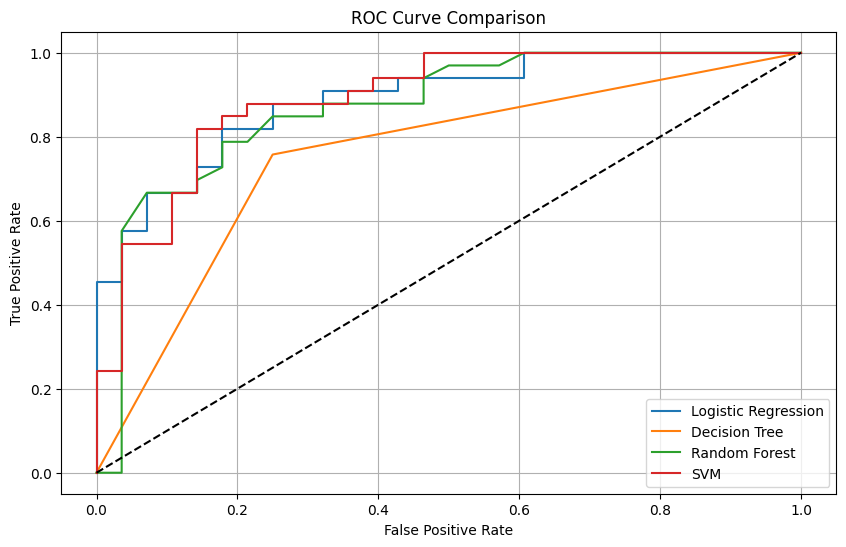

In [11]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

for name, model in models.items():
    y_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.plot(fpr, tpr, label=f"{name}")

plt.plot([0, 1], [0, 1], 'k--')
plt.title("ROC Curve Comparison")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.show()
